In [1]:
import pandas as pd
import numpy as np
from keras.utils import get_file
from keras.models import Sequential, Input
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using TensorFlow backend.


In [2]:
sns.set_style("white")

## Download datasets

In [4]:
from keras.utils import get_file
try:
    path = get_file('NSL-KDD.zip', origin=\
                  'http://205.174.165.80/CICDataset/NSL-KDD/Dataset/NSL-KDD.zip')
    print(path)
except:
    print("Error downloading")

/Users/xuwen/.keras/datasets/NSL-KDD.zip


In [5]:
from zipfile import ZipFile
import os
filespath = os.path.dirname(path)+"/NSL-KDD/"
with ZipFile(path, 'r') as zipObj:
    zipObj.extractall(filespath)
    print(zipObj.namelist())

['index.html', 'KDDTest1.jpg', 'KDDTest-21.arff', 'KDDTest-21.txt', 'KDDTest+.arff', 'KDDTest+.txt', 'KDDTrain1.jpg', 'KDDTrain+.arff', 'KDDTrain+.txt', 'KDDTrain+_20Percent.arff', 'KDDTrain+_20Percent.txt']


In [6]:
df_train = pd.read_csv(filepath_or_buffer=filespath+'KDDTrain+.txt',delimiter=',', header=None)
df_test = pd.read_csv(filepath_or_buffer=filespath+'KDDTest+.txt',delimiter=',', header=None)

## Data mining and exploration

In [7]:
# The CSV file has no column heads, so add them
df_train.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome',
    'difficulty'
]
df_test.columns = df_train.columns

In [8]:
print(f"df_train.shape = {df_train.shape}")
print(f"df_test.shape = {df_test.shape}")

df_train.shape = (125973, 43)
df_test.shape = (22544, 43)


In [9]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [10]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [11]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [12]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


<AxesSubplot:ylabel='Frequency'>

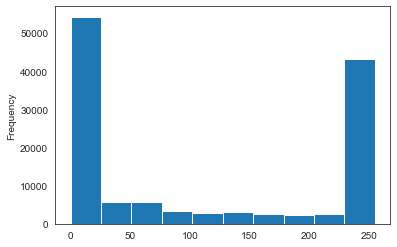

In [13]:
df_train.dst_host_srv_count.plot(kind='hist')

In [14]:
df_train.describe().loc['25%',:].value_counts()

0.00     32
2.00      2
0.09      1
18.00     1
82.00     1
10.00     1
0.05      1
Name: 25%, dtype: int64

In [15]:
df_train.describe().loc['75%',:].value_counts()

0.00      21
1.00       7
255.00     2
0.06       2
21.00      1
0.07       1
18.00      1
0.02       1
276.00     1
516.00     1
143.00     1
Name: 75%, dtype: int64

In [16]:
df_obj_col = df_train.select_dtypes(include='object').columns
print(df_obj_col)

Index(['protocol_type', 'service', 'flag', 'outcome'], dtype='object')


In [17]:
print(f"numbers of protocol_type: {len(df_train['protocol_type'].value_counts())}")
print(f"number of 'service' in train datasets: {len(df_train.service.value_counts())}")
print(f"number of 'flag' in train datasets: {len(df_train['flag'].value_counts())}")

numbers of protocol_type: 3
number of 'service' in train datasets: 70
number of 'flag' in train datasets: 11


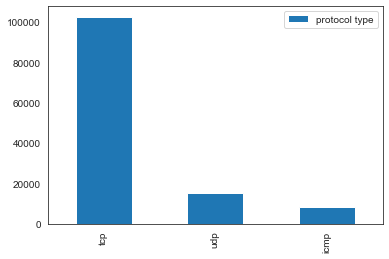

In [18]:
df_train["protocol_type"].value_counts().plot(kind='bar', label='protocol type')
plt.legend()
plt.show()

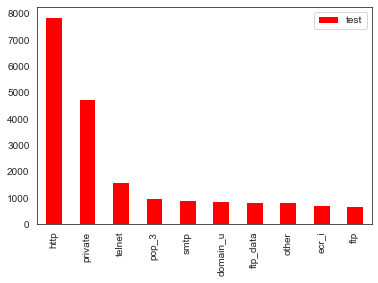

In [19]:
df_test['service'].value_counts().head(10).plot(kind='bar', color='red', label='test')
plt.legend()
plt.show()

In [20]:
new_df = pd.concat([df_test['service'].value_counts(), df_train['service'].value_counts()], axis=1)
# new_df.rename(columns={'service':'KDDTest+', 'service':'KDDTrain+'}, inplace=True)
new_df.columns=['KDDTest+', 'KDDTrain+']


In [21]:
new_df.sort_values(by='KDDTest+', ascending=False).head(10)

,KDDTest+,KDDTrain+
http,7853.0,40338
private,4774.0,21853
telnet,1626.0,2353
pop_3,1019.0,264
smtp,934.0,7313
domain_u,894.0,9043
ftp_data,851.0,6860
other,838.0,4359
ecr_i,752.0,3077
ftp,692.0,1754


In [22]:
new_df.sort_values(by='KDDTrain+', ascending=False).head(10)

,KDDTest+,KDDTrain+
http,7853.0,40338
private,4774.0,21853
domain_u,894.0,9043
smtp,934.0,7313
ftp_data,851.0,6860
eco_i,262.0,4586
other,838.0,4359
ecr_i,752.0,3077
telnet,1626.0,2353
finger,136.0,1767


In [23]:
df_train['service'].value_counts()

http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: service, Length: 70, dtype: int64

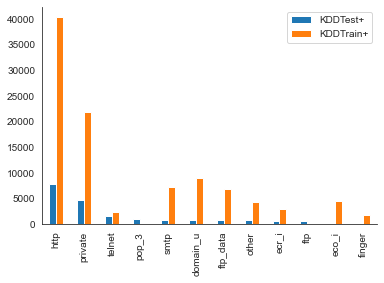

In [26]:

ax = pd.concat([df_test['service'].value_counts().head(10),df_train['service'].value_counts().head(10)],axis=1).plot(kind='bar')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['KDDTest+', 'KDDTrain+'])
plt.show()

In [27]:
df_test['service'].value_counts().head(10)

http        7853
private     4774
telnet      1626
pop_3       1019
smtp         934
domain_u     894
ftp_data     851
other        838
ecr_i        752
ftp          692
Name: service, dtype: int64

In [28]:
test_top10 = df_test['service'].value_counts().head(10)
train_top10 = df_train['service'].value_counts().head(10)

In [29]:
test_top10

http        7853
private     4774
telnet      1626
pop_3       1019
smtp         934
domain_u     894
ftp_data     851
other        838
ecr_i        752
ftp          692
Name: service, dtype: int64

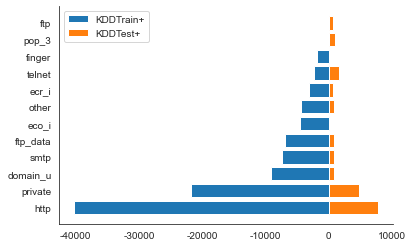

In [30]:
fig, ax = plt.subplots()
plt.rcParams['axes.unicode_minus']=False
plt.barh(train_top10.index, -train_top10)
plt.barh(test_top10.index, test_top10)

# df_train['service'].value_counts().head(10).plot(kind='barh', ax=ax1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(['KDDTrain+','KDDTest+'])
plt.show()

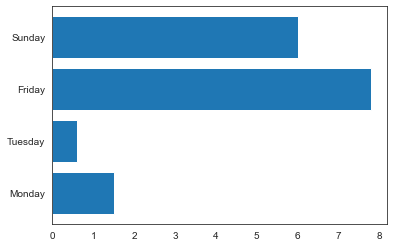

In [32]:
import matplotlib.pyplot as plt  
  
name_list = ['Monday','Tuesday','Friday','Sunday']  
num_list = [1.5,0.6,7.8,6]  
plt.barh(range(len(num_list)), num_list,tick_label = name_list)  
plt.show() 

In [33]:
# plt.barh(df_test['service'].value_counts().head(10), width=8)
# plt.show()

In [34]:
df_test['service'].value_counts().head(10)

http        7853
private     4774
telnet      1626
pop_3       1019
smtp         934
domain_u     894
ftp_data     851
other        838
ecr_i        752
ftp          692
Name: service, dtype: int64

In [35]:
df_train['service'].value_counts().head(10)

http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: service, dtype: int64

In [36]:
df_train['service'].value_counts().head(10)

http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
eco_i        4586
other        4359
ecr_i        3077
telnet       2353
finger       1767
Name: service, dtype: int64

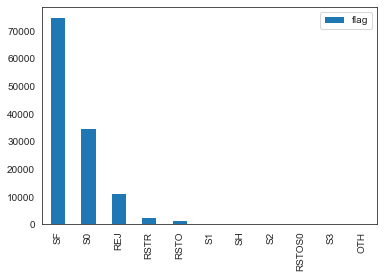

In [37]:
df_train["flag"].value_counts().plot(kind='bar')
plt.legend()
plt.show()

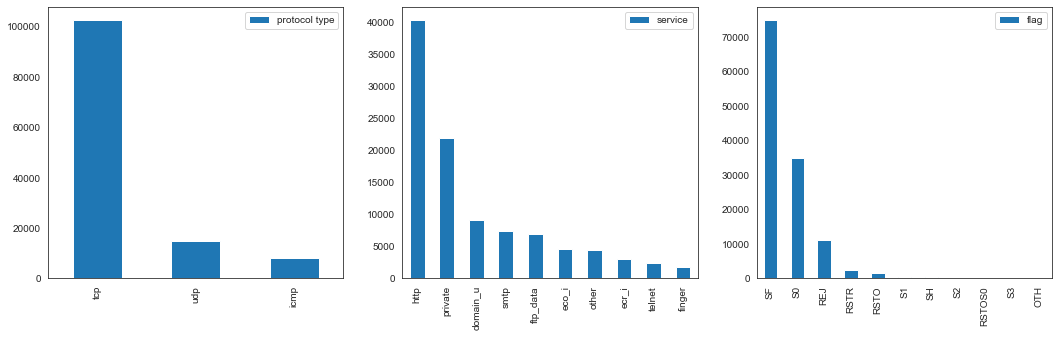

In [38]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
df_train["protocol_type"].value_counts().plot(kind='bar', label='protocol type')
plt.legend()
plt.subplot(132)
df_train['service'].value_counts().head(10).plot(kind='bar')
plt.legend()
plt.subplot(133)
df_train["flag"].value_counts().plot(kind='bar')
plt.legend()
plt.show()

In [39]:
df_train['label'] = np.where(df_train['outcome'].str.contains('normal'), 0, 1)
df_test['label'] = np.where(df_test['outcome'].str.contains('normal'), 0, 1)

## Data preprocessing

First, we divided the features to two groups: numeric features and category features.

In [40]:
df_train_obj = df_train.iloc[:, :-3].select_dtypes(include='object')
df_train_num = df_train.iloc[:, :-3].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_train_num.shape}")
print(f"shape of object features: {df_train_obj.shape}")

shape of numeric features: (125973, 38)
shape of object features: (125973, 3)


In [41]:
df_test_obj = df_test.iloc[:, :-3].select_dtypes(include='object')
df_test_num = df_test.iloc[:, :-3].select_dtypes(exclude='object')

print(f"shape of numeric features: {df_test_num.shape}")
print(f"shape of object features: {df_test_obj.shape}")

shape of numeric features: (22544, 38)
shape of object features: (22544, 3)


In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder, RobustScaler
enc = OneHotEncoder(handle_unknown='ignore')
X_train_enc = enc.fit_transform(df_train_obj)
X_train = np.c_[df_train_num, X_train_enc.toarray()][df_train.outcome == 'normal']
# scaler = StandardScaler()
# scaler.fit_transform(X_train)
X_test_enc = enc.transform(df_test_obj)
X_test_normal = np.c_[df_test_num, X_test_enc.toarray()][df_test.outcome == 'normal']
X_test_abnormal = np.c_[df_test_num, X_test_enc.toarray()][df_test.outcome != 'normal']

In [43]:
X_test = np.c_[df_test_num, X_test_enc.toarray()]
y_test = df_test['label']

In [44]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
count,67343.000000,6.734300e+04,6.734300e+04,67343.000000,67343.0,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,...,67343.000000,67343.000000,67343.0,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.000000,67343.00000
mean,168.587396,1.313328e+04,4.329685e+03,0.000104,0.0,0.000148,0.230655,0.001381,0.710646,0.507076,...,0.039989,0.003252,0.0,0.002168,0.005257,0.005361,0.001767,0.000668,0.941345,0.00003
std,1304.452127,4.181131e+05,6.546282e+04,0.010195,0.0,0.017233,2.308336,0.049480,0.453466,32.743321,...,0.195936,0.056934,0.0,0.046512,0.072313,0.073020,0.042000,0.025842,0.234979,0.00545
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.290000e+02,1.050000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
50%,0.000000,2.330000e+02,3.790000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
75%,0.000000,3.240000e+02,2.056000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,40504.000000,8.958152e+07,7.028652e+06,1.000000,0.0,3.000000,77.000000,4.000000,1.000000,7479.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [45]:
print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test_normal: {X_test_normal.shape}")
print(f"shape of X_test_abnormal: {X_test_abnormal.shape}")

shape of X_train: (67343, 122)
shape of X_test_normal: (9711, 122)
shape of X_test_abnormal: (12833, 122)


In [46]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
# scaler = RobustScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_normal_scaled = scaler.transform(X_test_normal)
X_test_abnormal_scaled = scaler.transform(X_test_abnormal)


In [ ]:
from sklearn.manifold import TSNE
X_train_all = np.c_[df_train_num, X_train_enc.toarray()]
X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X=X_train_all)
X_embedded.shape

In [ ]:
X_embedded_normal = X_embedded[np.where(df_train['label']==0)]
X_embedded_abnormal = X_embedded[np.where(df_train['label']==1)]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(*zip(*X_embedded_normal), c='g', s=2, alpha=0.7, label='normal')
ax.scatter(*zip(*X_embedded_abnormal), c='r', s=2, alpha=0.7, label='abnormal')
plt.legend()
plt.show()

In [ ]:
X_embedded_normal

# Building model and train the model

In [163]:
from keras.models import Model, Sequential
from keras.layers import Dense
from keras import Input
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train_scaled.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 5
autoencoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu'),  
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])
autoencoder.compile(loss='mse', optimizer='Adam')

input shape: 122


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3936      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 122)               4026      
Total params: 8,319
Trainable params: 8,319
Non-trainable params: 0
_________________________________________________________________


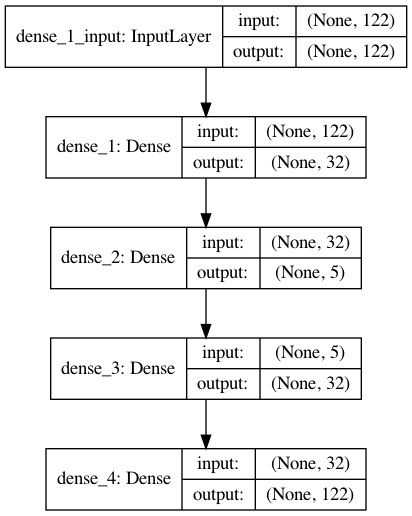

In [165]:
from keras.utils.vis_utils import plot_model
autoencoder.summary()
plot_model(autoencoder, to_file='autoencoder_model_plot.png', show_shapes=True, show_layer_names=True)

In [20]:
from keras.models import Model, Sequential
from keras.layers import Dense
from keras import Input
from keras.callbacks import EarlyStopping
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train_scaled.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 5
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')

input shape: 122


In [21]:
print(encoder.summary())
print("\n###########################################\n")
print(decoder.summary())
print("\n###########################################\n")
print(autoencoder.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                3936      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 165       
Total params: 4,101
Trainable params: 4,101
Non-trainable params: 0
_________________________________________________________________
None

###########################################

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_4 (Dense)              (None, 122)               4026      
Total params: 4,218
Trainable params: 4,218
Non-trainable params: 0
___________________________________________

In [22]:
history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, validation_split=0.2, callbacks=[callback])


Train on 53874 samples, validate on 13469 samples
Epoch 1/20
53874/53874 [==============================] - 8s 151us/step - loss: 0.0063 - val_loss: 0.0029
Epoch 2/20
53874/53874 [==============================] - 7s 126us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 3/20
53874/53874 [==============================] - 6s 120us/step - loss: 0.0021 - val_loss: 0.0020
Epoch 4/20
53874/53874 [==============================] - 7s 122us/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/20
53874/53874 [==============================] - 7s 128us/step - loss: 0.0018 - val_loss: 0.0018
Epoch 6/20
53874/53874 [==============================] - 7s 123us/step - loss: 0.0017 - val_loss: 0.0017
Epoch 7/20
53874/53874 [==============================] - 7s 121us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/20
53874/53874 [==============================] - 7s 122us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 9/20
53874/53874 [==============================] - 7s 122us/step - loss: 0.0015 - val_loss: 0.0

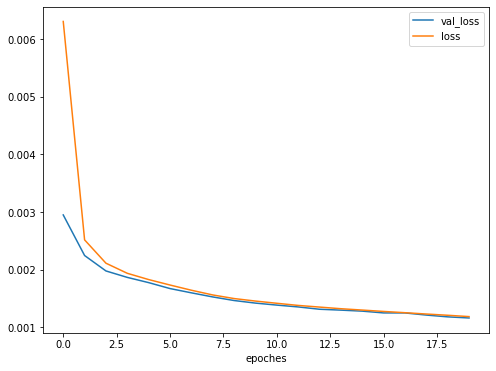

In [111]:
pd.DataFrame(history.history).plot(kind='line', xlabel='epoches', figsize=(8, 6))
plt.show()

# Detecting anomalies with RMSE

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train_pred = autoencoder.predict(X_train_scaled)
rmse = mean_squared_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values', squared=False)
mae = mean_absolute_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values')

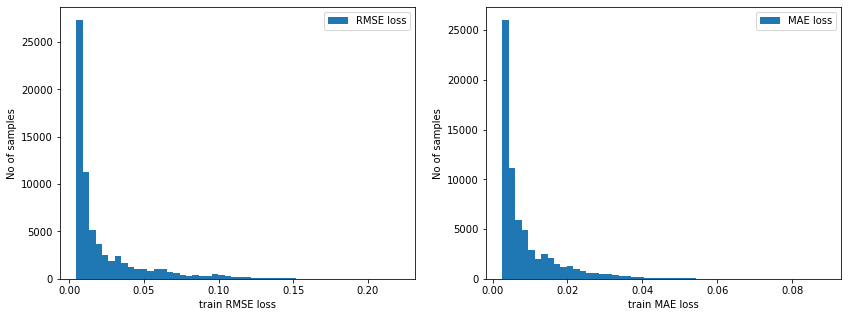

In [25]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(rmse, bins=50, label="RMSE loss")
plt.xlabel("train RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae, bins=50, label="MAE loss")
plt.xlabel("train MAE loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

In [26]:
threshold_rmse = np.percentile(rmse,95)
threshold_mae = np.percentile(mae,95)
print("Reconstruction error RMSE threshold: ", threshold_rmse)
print("Reconstruction error MAE threshold: ", threshold_mae)

Reconstruction error RMSE threshold:  0.08028203665476981
Reconstruction error MAE threshold:  0.027474285264036585


In [27]:
X_test_normal_pred = autoencoder.predict(X_test_normal_scaled)
rmse_test_normal = mean_squared_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values', squared=False)
mae_test_normal = mean_absolute_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values')


X_test_abnormal_pred = autoencoder.predict(X_test_abnormal_scaled)
rmse_test_abnormal = mean_squared_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values', squared=False)
mae_test_abnormal = mean_absolute_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values')




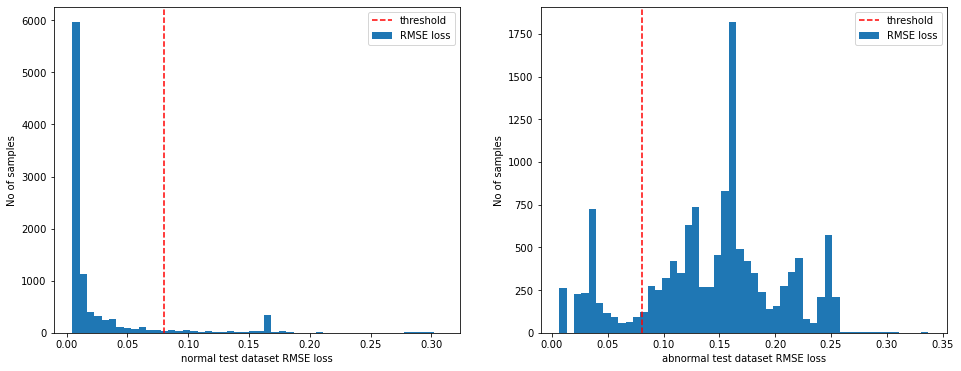

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(rmse_test_normal, bins=50, label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(rmse_test_abnormal, bins=50, label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

False Positive : 892
True Negative : 8819
True Positive : 10767
False Negative : 2066


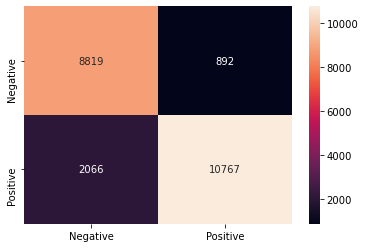

In [29]:
FP = np.sum(rmse_test_normal > threshold_rmse)
TN = len(rmse_test_normal) - FP
TP = np.sum(rmse_test_abnormal > threshold_rmse)
FN = np.sum(rmse_test_abnormal <= threshold_rmse)

print(f"False Positive : {FP}")
print(f"True Negative : {TN}")
print(f"True Positive : {TP}")
print(f"False Negative : {FN}")

ticklabels = ['Negative', 'Positive']
confusion_matrix = [[TN, FP], [FN, TP]]
sns.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=ticklabels, yticklabels=ticklabels)
plt.show()

In [30]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"precision = {precision}")
print(f"recall = {recall}")

Accuracy = (TP + TN) / (TP + TN + FP + FN)
F1 = 2 * precision * recall / (precision + recall)
print(f"accuracy = {Accuracy}")
print(f"F1 = {F1}")

precision = 0.9234925808388369
recall = 0.8390088054235175
accuracy = 0.8687899219304471
F1 = 0.8792258696717296


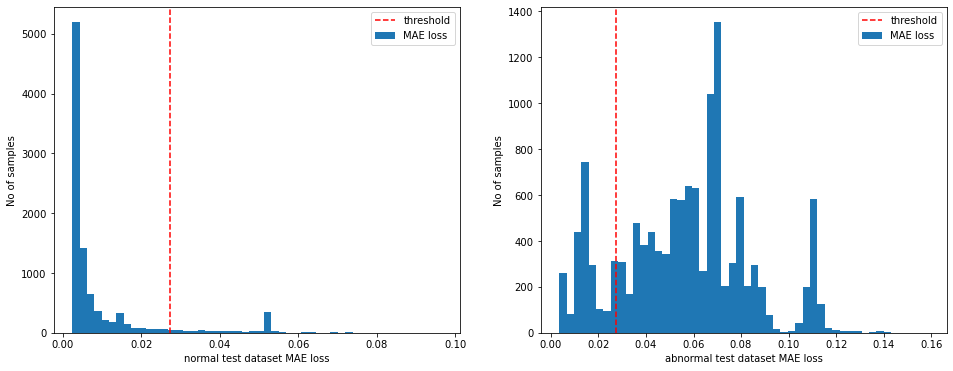

In [31]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(mae_test_normal, bins=50, label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae_test_abnormal, bins=50, label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()


## using MAE as estimation

False Positive : 873
True Negative : 8838
True Positive : 10595
False Negative : 2238


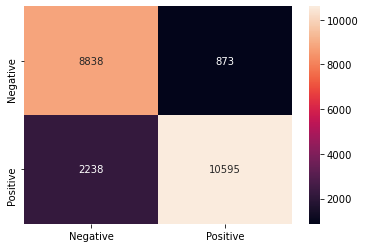

In [32]:
FP_mae = np.sum(mae_test_normal > threshold_mae)
TN_mae = len(mae_test_normal) - FP_mae
TP_mae = np.sum(mae_test_abnormal > threshold_mae)
FN_mae = np.sum(mae_test_abnormal <= threshold_mae)

print(f"False Positive : {FP_mae}")
print(f"True Negative : {TN_mae}")
print(f"True Positive : {TP_mae}")
print(f"False Negative : {FN_mae}")

confusion_matrix_mae = [[TN_mae, FP_mae], [FN_mae, TP_mae]]
sns.heatmap(confusion_matrix_mae, annot=True, fmt="d", xticklabels=ticklabels, yticklabels=ticklabels)
plt.show()

In [33]:
precision_mae = TP_mae / (TP_mae + FP_mae)
recall_mae = TP_mae / (TP_mae + FN_mae)
print(f"precision = {precision_mae}")
print(f"recall = {recall_mae}")
Accuracy_mae = (TP_mae + TN_mae) / (TP_mae + TN_mae + FP_mae + FN_mae)
F1_mae = 2 * precision_mae * recall_mae / (precision_mae + recall_mae)
print(f"accuracy = {Accuracy_mae}")
print(f"F1 = {F1_mae}")

precision = 0.9238751307987443
recall = 0.8256058598924647
accuracy = 0.8620031937544358
F1 = 0.8719805769309904


## experiment 2: remove outliers before feeding into ML model

### upper outliers are the main issue we need to handle, here we set 95th percentile as our upper outlier fence, any number that greater than 95th percentile will marked as outliers and remove from the dataset.  

In [47]:
outlier_fence_95 = np.percentile(X_train, 95, axis=0)
X_train_new = X_train.copy()
for index, fence in enumerate(outlier_fence_95):
    boolarr = X_train_new[:,index] <= fence
    X_train_new = X_train_new[boolarr]
X_train_new.shape

(39252, 122)

In [48]:
X_train_new[0][1]

491.0

In [49]:
X_train.shape

(67343, 122)

In [50]:
X_v_abnormal = np.c_[df_train_num, X_train_enc.toarray()][df_train.outcome != 'normal']


In [51]:
X_v_abnormal[10]

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 9.60e+01, 1.60e+01, 1.00e+00, 1.00e+00, 0.00e+00,
       0.00e+00, 1.70e-01, 5.00e-02, 0.00e+00, 2.55e+02, 2.00e+00,
       1.00e-02, 6.00e-02, 0.00e+00, 0.00e+00, 1.00e+00, 1.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e

In [ ]:
from sklearn.manifold import TSNE
X_train_all_95per = np.r_[X_train_new, X_v_abnormal]
X_embedded_95per = TSNE(n_components=2, random_state=42).fit_transform(X=X_train_all_95per)
X_embedded_95per.shape

In [ ]:
X_embedded_95per[0:X_train_new.shape[0]].shape

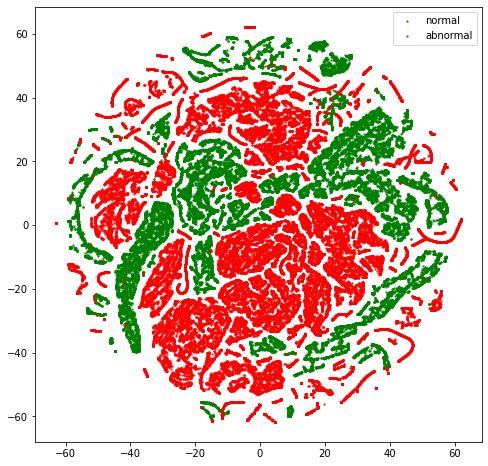

In [56]:
X_embedded_normal_95per = X_embedded_95per[0:X_train_new.shape[0]]
X_embedded_abnormal_95per = X_embedded_95per[X_train_new.shape[0]:]
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(*zip(*X_embedded_normal_95per), c='g', s=2, alpha=0.7, label='normal')
ax.scatter(*zip(*X_embedded_abnormal_95per), c='r', s=2, alpha=0.7, label='abnormal')
plt.legend()
plt.show()

In [172]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
# scaler = RobustScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_normal_scaled = scaler.transform(X_test_normal)
X_test_abnormal_scaled = scaler.transform(X_test_abnormal)


In [175]:
callback = EarlyStopping(patience=3, mode='min')

input_shape = X_train_scaled.shape[1]
print(f"input shape: {input_shape}")
encoding_dim = 5
encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
])
decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
])

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss='mse', optimizer='Adam')

input shape: 122


In [176]:
history2 = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, validation_split=0.2, callbacks=[callback])


Train on 31401 samples, validate on 7851 samples
Epoch 1/20
31401/31401 [==============================] - 5s 156us/step - loss: 0.0058 - val_loss: 0.0019
Epoch 2/20
31401/31401 [==============================] - 4s 131us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 3/20
31401/31401 [==============================] - 4s 133us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/20
31401/31401 [==============================] - 4s 131us/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/20
31401/31401 [==============================] - 4s 131us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/20
31401/31401 [==============================] - 4s 133us/step - loss: 9.4783e-04 - val_loss: 9.5089e-04
Epoch 7/20
31401/31401 [==============================] - 4s 132us/step - loss: 8.8873e-04 - val_loss: 8.7792e-04
Epoch 8/20
31401/31401 [==============================] - 4s 126us/step - loss: 8.3363e-04 - val_loss: 8.5272e-04
Epoch 9/20
31401/31401 [==============================] - 4s 126us/step - loss:

<AxesSubplot:xlabel='epoches'>

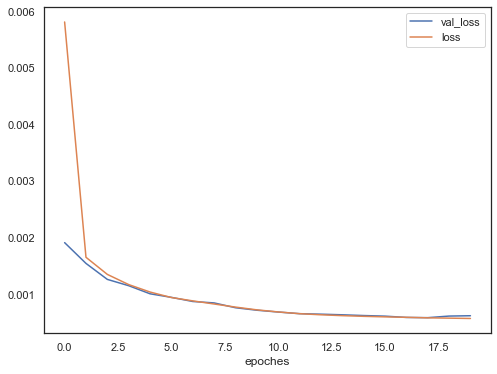

In [183]:
pd.DataFrame(history2.history).plot(kind='line', xlabel='epoches', figsize=(8, 6))

In [180]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
X_train_pred = autoencoder.predict(X_train_scaled)
rmse = mean_squared_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values', squared=False)
mae = mean_absolute_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values')

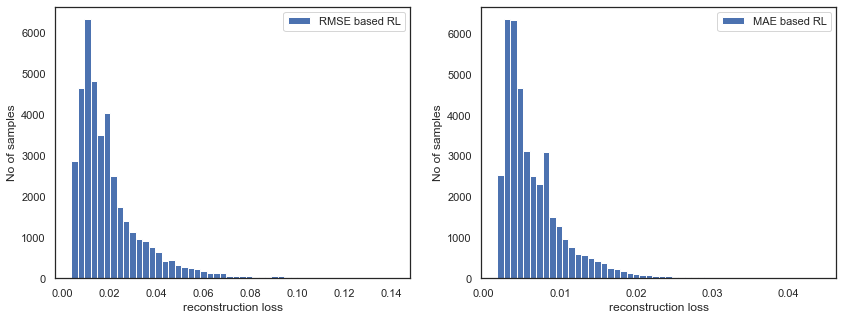

In [181]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(rmse, bins=50, label="RMSE based RL")
plt.xlabel("reconstruction loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae, bins=50, label="MAE based RL")
plt.xlabel("reconstruction loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

In [182]:
threshold_rmse = np.max(rmse)
threshold_mae = np.max(mae)
print("Reconstruction error RMSE threshold: ", threshold_rmse)
print("Reconstruction error MAE threshold: ", threshold_mae)

Reconstruction error RMSE threshold:  0.14120278055628704
Reconstruction error MAE threshold:  0.04413944991656507


In [182]:
X_test_normal_pred = autoencoder.predict(X_test_normal_scaled)
rmse_test_normal = mean_squared_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values', squared=False)
mae_test_normal = mean_absolute_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values')

X_test_abnormal_pred = autoencoder.predict(X_test_abnormal_scaled)
rmse_test_abnormal = mean_squared_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values', squared=False)
mae_test_abnormal = mean_absolute_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values')


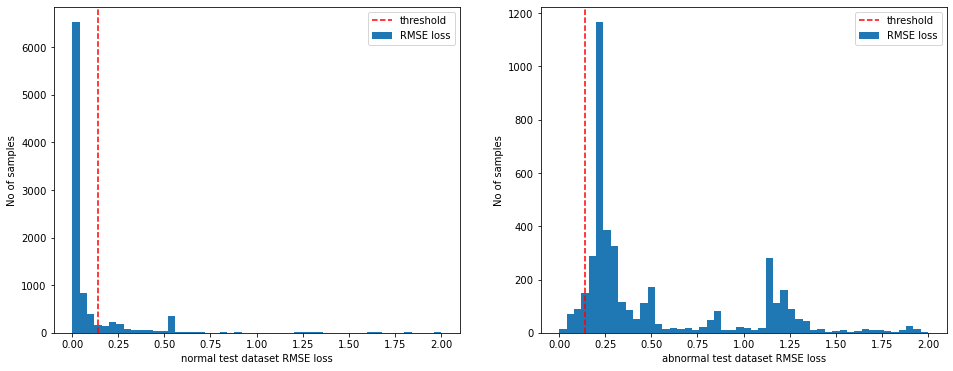

In [184]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(rmse_test_normal, bins=50, range=(0, 2), label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(rmse_test_abnormal, bins=50, range=(0, 2), label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

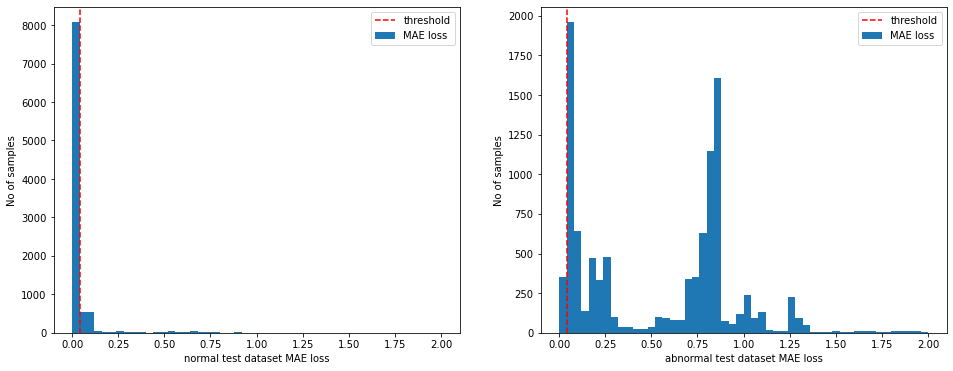

In [110]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(mae_test_normal, bins=50, range=(0, 2), label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae_test_abnormal, bins=50, range=(0, 2), label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()

False Positive : 1875
True Negative : 7836
True Positive : 12597
False Negative : 236
#####################
precision = 0.8704394693200663
recall = 0.9816099119457649
accuracy = 0.906360894251242
F1 = 0.9226881523530489
#####################


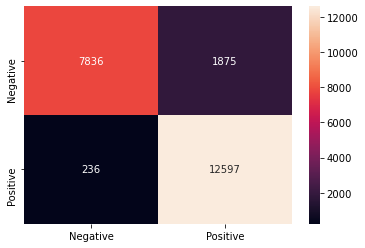

In [185]:
FP = np.sum(rmse_test_normal > threshold_rmse)
TN = len(rmse_test_normal) - FP
TP = np.sum(rmse_test_abnormal > threshold_rmse)
FN = np.sum(rmse_test_abnormal <= threshold_rmse)

print(f"False Positive : {FP}")
print(f"True Negative : {TN}")
print(f"True Positive : {TP}")
print(f"False Negative : {FN}")
print("#####################")

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"precision = {precision}")
print(f"recall = {recall}")

Accuracy = (TP + TN) / (TP + TN + FP + FN)
F1 = 2 * precision * recall / (precision + recall)
print(f"accuracy = {Accuracy}")
print(f"F1 = {F1}")
print("#####################")

ticklabels = ['Negative', 'Positive']
confusion_matrix = [[TN, FP], [FN, TP]]
sns.heatmap(confusion_matrix, annot=True, fmt="d", xticklabels=ticklabels, yticklabels=ticklabels)
plt.show()

## using MAE as estimation

False Positive : 1682
True Negative : 8029
True Positive : 12476
False Negative : 357


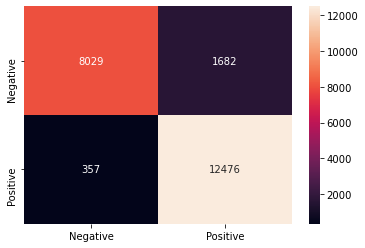

In [186]:
FP_mae = np.sum(mae_test_normal > threshold_mae)
TN_mae = len(mae_test_normal) - FP_mae
TP_mae = np.sum(mae_test_abnormal > threshold_mae)
FN_mae = np.sum(mae_test_abnormal <= threshold_mae)

print(f"False Positive : {FP_mae}")
print(f"True Negative : {TN_mae}")
print(f"True Positive : {TP_mae}")
print(f"False Negative : {FN_mae}")

confusion_matrix_mae = [[TN_mae, FP_mae], [FN_mae, TP_mae]]
sns.heatmap(confusion_matrix_mae, annot=True, fmt="d", xticklabels=ticklabels, yticklabels=ticklabels)
plt.show()

In [187]:
precision_mae = TP_mae / (TP_mae + FP_mae)
recall_mae = TP_mae / (TP_mae + FN_mae)
print(f"precision = {precision_mae}")
print(f"recall = {recall_mae}")
Accuracy_mae = (TP_mae + TN_mae) / (TP_mae + TN_mae + FP_mae + FN_mae)
F1_mae = 2 * precision_mae * recall_mae / (precision_mae + recall_mae)
print(f"accuracy = {Accuracy_mae}")
print(f"F1 = {F1_mae}")

precision = 0.8811979093092245
recall = 0.972181095612873
accuracy = 0.9095546486870121
F1 = 0.9244563002482309


## 50 Epoch

In [157]:
def model(X_train):
    callback = EarlyStopping(patience=3, mode='min')
    input_shape = X_train.shape[1]
    print(f"input shape: {input_shape}")
    encoding_dim = 5
    encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
    ])
    decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
    ])

    autoencoder = Sequential([encoder, decoder])
    autoencoder.compile(loss='mse', optimizer='Adam')
    autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.2, callbacks=[callback])
    return autoencoder
del autoencoder
autoencoder = model(X_train_scaled)

input shape: 122
Train on 31401 samples, validate on 7851 samples
Epoch 1/50
31401/31401 [==============================] - 5s 159us/step - loss: 0.0052 - val_loss: 0.0020
Epoch 2/50
31401/31401 [==============================] - 4s 132us/step - loss: 0.0016 - val_loss: 0.0015
Epoch 3/50
31401/31401 [==============================] - 4s 128us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/50
31401/31401 [==============================] - 4s 130us/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/50
31401/31401 [==============================] - 4s 124us/step - loss: 9.8155e-04 - val_loss: 9.4663e-04
Epoch 6/50
31401/31401 [==============================] - 4s 122us/step - loss: 8.9395e-04 - val_loss: 8.9700e-04
Epoch 7/50
31401/31401 [==============================] - 4s 121us/step - loss: 8.4878e-04 - val_loss: 8.5343e-04
Epoch 8/50
31401/31401 [==============================] - 4s 123us/step - loss: 8.1484e-04 - val_loss: 8.3706e-04
Epoch 9/50
31401/31401 [==============================

<AxesSubplot:xlabel='epoches'>

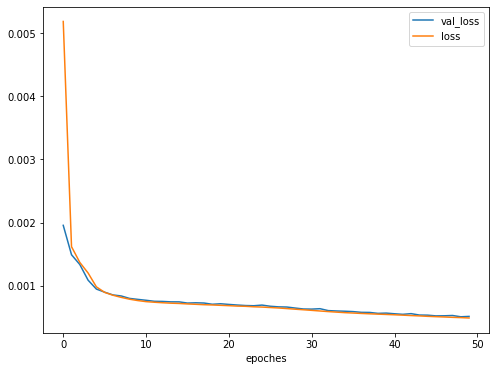

In [158]:
pd.DataFrame(autoencoder.history.history).plot(kind='line', xlabel='epoches', figsize=(8, 6))

In [52]:
from keras.models import load_model
autoencoder_draw = load_model('autoencoder.hdf5', compile=True)

In [53]:
autoencoder_draw.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_82 (Sequential)   (None, 5)                 4101      
_________________________________________________________________
sequential_83 (Sequential)   (None, 122)               4218      
Total params: 8,319
Trainable params: 8,319
Non-trainable params: 0
_________________________________________________________________


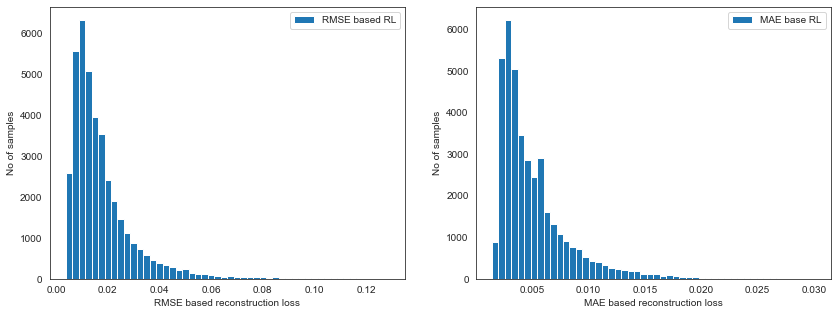

Reconstruction error RMSE threshold:  0.1286360449506866
Reconstruction error MAE threshold:  0.030079469362814002


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
outlier_fence_95 = np.percentile(X_train, 95, axis=0)
X_train_new = X_train.copy()
for index, fence in enumerate(outlier_fence_95):
    boolarr = X_train_new[:,index] <= fence
    X_train_new = X_train_new[boolarr]
# X_train_new.shape
from sklearn.preprocessing import MinMaxScaler
# scaler = RobustScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_normal_scaled = scaler.transform(X_test_normal)
X_test_abnormal_scaled = scaler.transform(X_test_abnormal)
X_train_pred_draw = autoencoder_draw.predict(X_train_scaled)
rmse_draw = mean_squared_error(X_train_scaled.T, X_train_pred_draw.T, multioutput='raw_values', squared=False)
mae_draw = mean_absolute_error(X_train_scaled.T, X_train_pred_draw.T, multioutput='raw_values')
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(rmse_draw, bins=50, label="RMSE based RL")
plt.xlabel("RMSE based reconstruction loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae_draw, bins=50, label="MAE base RL")
plt.xlabel("MAE based reconstruction loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

threshold_rmse_draw = np.max(rmse_draw)
threshold_mae_draw = np.max(mae_draw)
print("Reconstruction error RMSE threshold: ", threshold_rmse_draw)
print("Reconstruction error MAE threshold: ", threshold_mae_draw)

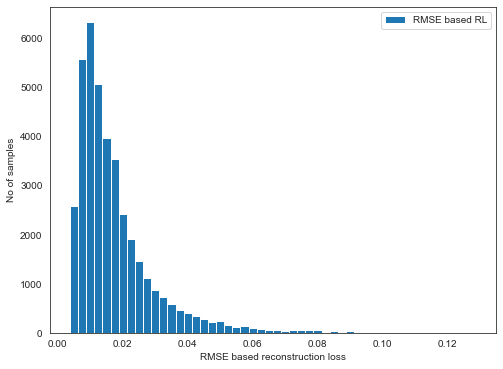

In [56]:
plt.figure(figsize=(8,6))
# plt.subplot(121)
plt.hist(rmse_draw, bins=50, label="RMSE based RL")
plt.xlabel("RMSE based reconstruction loss")
plt.ylabel("No of samples")
plt.legend()
plt.show()

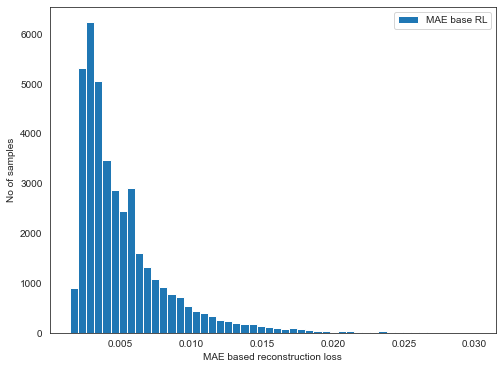

Reconstruction error RMSE threshold:  0.1286360449506866
Reconstruction error MAE threshold:  0.030079469362814002


In [57]:
plt.figure(figsize=(8,6))
# plt.subplot(122)
plt.hist(mae_draw, bins=50, label="MAE base RL")
plt.xlabel("MAE based reconstruction loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

threshold_rmse_draw = np.max(rmse_draw)
threshold_mae_draw = np.max(mae_draw)
print("Reconstruction error RMSE threshold: ", threshold_rmse_draw)
print("Reconstruction error MAE threshold: ", threshold_mae_draw)

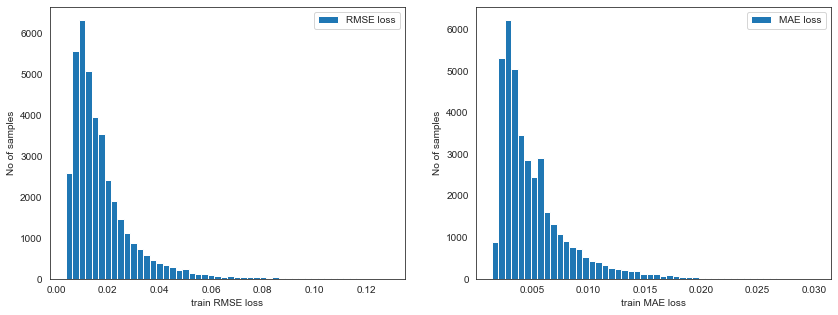

Reconstruction error RMSE threshold:  0.1286360449506866
Reconstruction error MAE threshold:  0.030079469362814002


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


# X_train_pred = autoencoder.predict(X_train_scaled)
X_train_pred = autoencoder_draw.predict(X_train_scaled)

rmse = mean_squared_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values', squared=False)
mae = mean_absolute_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values')
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(rmse, bins=50, label="RMSE loss")
plt.xlabel("train RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae, bins=50, label="MAE loss")
plt.xlabel("train MAE loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

threshold_rmse = np.max(rmse)
threshold_mae = np.max(mae)
print("Reconstruction error RMSE threshold: ", threshold_rmse)
print("Reconstruction error MAE threshold: ", threshold_mae)

In [62]:
# X_test_normal_pred = autoencoder.predict(X_test_normal_scaled)
X_test_normal_pred = autoencoder_draw.predict(X_test_normal_scaled)
rmse_test_normal = mean_squared_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values', squared=False)
mae_test_normal = mean_absolute_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values')

# X_test_abnormal_pred = autoencoder.predict(X_test_abnormal_scaled)
X_test_abnormal_pred = autoencoder_draw.predict(X_test_abnormal_scaled)
rmse_test_abnormal = mean_squared_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values', squared=False)
mae_test_abnormal = mean_absolute_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values')


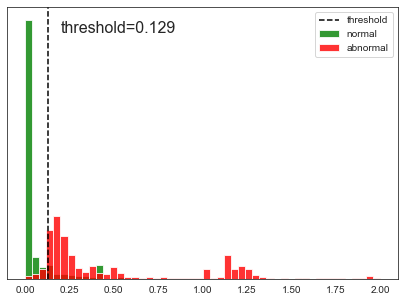

In [79]:
fig, ax = plt.subplots(figsize=(7,5))
# plt.subplot(121)
ax.hist(rmse_test_normal, bins=50, range=(0, 2), density=True, alpha=.8, color='g', label="normal")
ax.hist(rmse_test_abnormal, bins=50, range=(0, 2), density=True, alpha=.8, color='r', label="abnormal")
ax.axvline(x=threshold_rmse_draw, color='k', ls='--', label='threshold')
# plt.xlabel("KDDTest+ dataset reconstruction losses with RMSE in [0, 2]")
# plt.ylabel("Number of instances")
ax.get_yaxis().set_visible(False)
ax.text(0.20, 17.5, 'threshold=0.129', fontsize=16)
plt.legend()
plt.show()

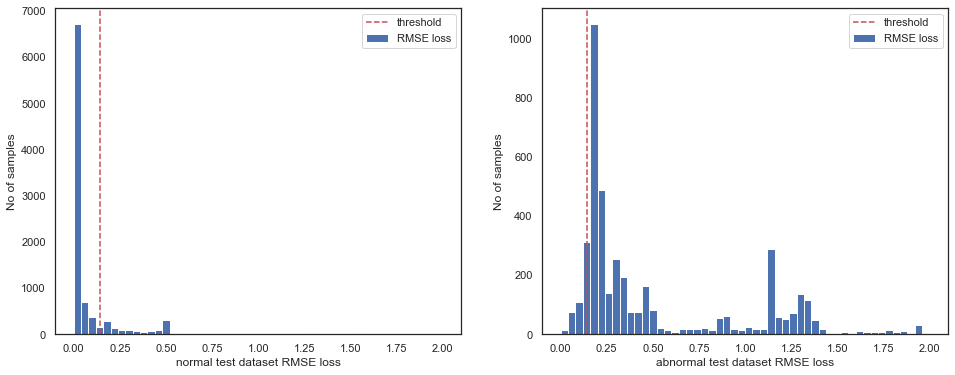

In [192]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(rmse_test_normal, bins=50, range=(0, 2), label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(rmse_test_abnormal, bins=50, range=(0, 2), label="RMSE loss")
plt.axvline(x=threshold_rmse, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset RMSE loss")
plt.ylabel("No of samples")
plt.legend()

plt.show()

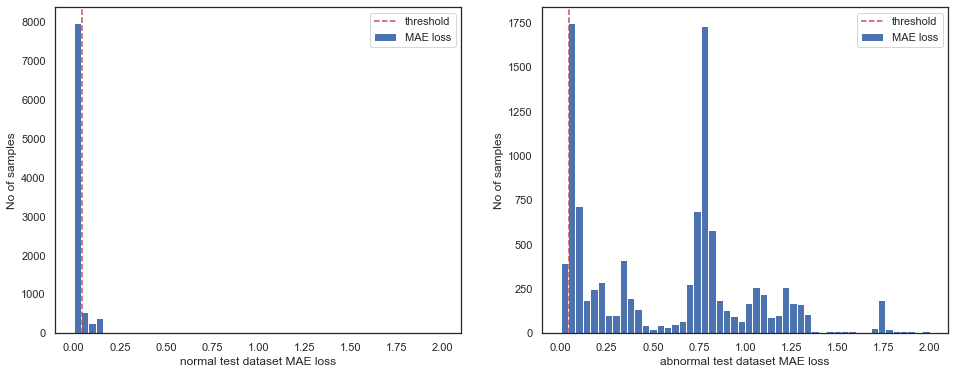

In [235]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.hist(mae_test_normal, bins=50, range=(0, 2), label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("normal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()

plt.subplot(122)
plt.hist(mae_test_abnormal, bins=50, range=(0, 2), label="MAE loss")
plt.axvline(x=threshold_mae, color='r', ls='--', label='threshold')
plt.xlabel("abnormal test dataset MAE loss")
plt.ylabel("No of samples")
plt.legend()

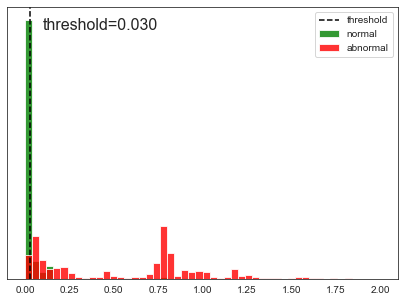

In [75]:
fig, ax = plt.subplots(figsize=(7,5))
# plt.subplot(121)
ax.hist(mae_test_normal, bins=50, range=(0, 2), density=True, alpha=.8, color='g', label="normal")
ax.hist(mae_test_abnormal, bins=50, range=(0, 2), density=True, alpha=.8, color='r', label="abnormal")
ax.axvline(x=threshold_mae_draw, color='k', ls='--', label='threshold')
ax.get_yaxis().set_visible(False)
ax.text(0.1, 20, 'threshold=0.030', fontsize=16)
plt.legend()
plt.show()

In [163]:
FP = np.sum(rmse_test_normal > threshold_rmse)
TN = len(rmse_test_normal) - FP
TP = np.sum(rmse_test_abnormal > threshold_rmse)
FN = np.sum(rmse_test_abnormal <= threshold_rmse)

print(f"False Positive : {FP}")
print(f"True Negative : {TN}")
print(f"True Positive : {TP}")
print(f"False Negative : {FN}")
print("#####################")

precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"precision = {precision}")
print(f"recall = {recall}")

Accuracy = (TP + TN) / (TP + TN + FP + FN)
F1 = 2 * precision * recall / (precision + recall)
print(f"accuracy = {Accuracy}")
print(f"F1 = {F1}")
print("#####################")


False Positive : 1919
True Negative : 7792
True Positive : 12603
False Negative : 230
#####################
precision = 0.8678556672634623
recall = 0.9820774565573132
accuracy = 0.9046753016323634
F1 = 0.9214403216962164
#####################


In [164]:
FP_mae = np.sum(mae_test_normal > threshold_mae)
TN_mae = len(mae_test_normal) - FP_mae
TP_mae = np.sum(mae_test_abnormal > threshold_mae)
FN_mae = np.sum(mae_test_abnormal <= threshold_mae)

print(f"False Positive : {FP_mae}")
print(f"True Negative : {TN_mae}")
print(f"True Positive : {TP_mae}")
print(f"False Negative : {FN_mae}")
print("#####################")
precision_mae = TP_mae / (TP_mae + FP_mae)
recall_mae = TP_mae / (TP_mae + FN_mae)
print(f"precision = {precision_mae}")
print(f"recall = {recall_mae}")
Accuracy_mae = (TP_mae + TN_mae) / (TP_mae + TN_mae + FP_mae + FN_mae)
F1_mae = 2 * precision_mae * recall_mae / (precision_mae + recall_mae)
print(f"accuracy = {Accuracy_mae}")
print(f"F1 = {F1_mae}")

False Positive : 1916
True Negative : 7795
True Positive : 12631
False Negative : 202
#####################
precision = 0.8682889942943562
recall = 0.9842593314112055
accuracy = 0.9060503903477644
F1 = 0.9226442658875091


In [169]:
# autoencoder.save("autoencoder.hdf5", overwrite=True, include_optimizer=True)

In [254]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [261]:
# X_test_scaled = np.r_[X_test_normal_scaled, X_test_abnormal_scaled]
# X_test_scaled.shape
X_test_scaled = scaler.fit_transform(X_test)
print(X_test_scaled.shape)
X_test_all_pred = autoencoder.predict(X_test_scaled)
mae_test_all = mean_absolute_error(X_test_scaled.T, X_test_all_pred.T, multioutput='raw_values')
mae_test_all


(22544, 122)


array([0.11157139, 0.11119176, 0.02849818, ..., 0.01706041, 0.01751879,
       0.11655217])

In [291]:
fpr.shape

(2835,)

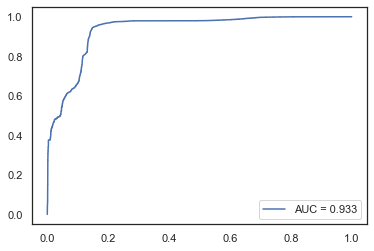

In [271]:
fpr, tpr, thresholds = roc_curve(y_test, mae_test_all)
roc_auc = roc_auc_score(y_test, mae_test_all)
print()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:0.3f}' )
plt.legend()
plt.show()

In [287]:
roc_auc

0.932860085040223

In [284]:
with open ('fpr_AE.npy', 'wb') as f:
    np.save(f, fpr)
    np.save(f, tpr)

In [190]:
def performance(rloss_normal, rloss_abnormal, threshold):
    FP = np.sum(rloss_normal > threshold)
    TN = len(rloss_normal) - FP
    TP = np.sum(rloss_abnormal > threshold)
    FN = np.sum(rloss_abnormal <= threshold)

    print(f"False Positive : {FP}")
    print(f"True Negative : {TN}")
    print(f"True Positive : {TP}")
    print(f"False Negative : {FN}")
    print("#####################")

    Precision = TP / (TP + FP)
    Recall = TP / (TP + FN)
    print(f"precision = {Precision}")
    print(f"recall = {Recall}")

    Accuracy = (TP + TN) / (TP + TN + FP + FN)
    F1 = 2 * Precision * Recall / (Precision + Recall)
    print(f"accuracy = {Accuracy}")
    print(f"F1 = {F1}")
    print("#####################")
    return Accuracy, Precision, Recall, F1

In [191]:
def model(X_train):
    callback = EarlyStopping(patience=3, mode='min')
    input_shape = X_train.shape[1]
    print(f"input shape: {input_shape}")
    encoding_dim = 5
    encoder = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape, )),
    Dense(encoding_dim, activation='relu')
    ])
    decoder = Sequential([
    Dense(32, activation='relu', input_shape=(encoding_dim,)),
    Dense(input_shape)
    ])

    autoencoder = Sequential([encoder, decoder])
    autoencoder.compile(loss='mse', optimizer='Adam')
    autoencoder.fit(X_train, X_train, epochs=50, validation_split=0.2, callbacks=[callback])
    return autoencoder
    

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
plist = [100, 99.7, 99, 98, 97, 96, 95, 94, 93, 92, 91, 90]
accuracy_rmse_list = []
precision_rmse_list = []
recall_rmse_list = []
f1_rmse_list = []

accuracy_mae_list = []
precision_mae_list = []
recall_mae_list = []
f1_mae_list = []

for percentile in plist:
    print(f"the percentile is: {percentile}%")
    outlier_fence = np.percentile(X_train, percentile, axis=0)
    X_train_new = X_train.copy()
    for index, fence in enumerate(outlier_fence):
        boolarr = X_train_new[:,index] <= fence
        X_train_new = X_train_new[boolarr]
    print(f"X_train_new shape: {X_train_new.shape}")
    
    X_train_scaled = scaler.fit_transform(X_train_new)
    X_test_normal_scaled = scaler.transform(X_test_normal)
    X_test_abnormal_scaled = scaler.transform(X_test_abnormal)
 
    autoencoder = model(X_train=X_train_scaled)
    
    X_train_pred = autoencoder.predict(X_train_scaled)
    rmse = mean_squared_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values', squared=False)
    mae = mean_absolute_error(X_train_scaled.T, X_train_pred.T, multioutput='raw_values')
    threshold_rmse = np.max(rmse)
    threshold_mae = np.max(mae)
    print("Reconstruction error RMSE threshold: ", threshold_rmse)
    print("Reconstruction error MAE threshold: ", threshold_mae)
    
    X_test_normal_pred = autoencoder.predict(X_test_normal_scaled)
    rmse_test_normal = mean_squared_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values', squared=False)
    mae_test_normal = mean_absolute_error(X_test_normal_scaled.T, X_test_normal_pred.T, multioutput='raw_values')

    X_test_abnormal_pred = autoencoder.predict(X_test_abnormal_scaled)
    rmse_test_abnormal = mean_squared_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values', squared=False)
    mae_test_abnormal = mean_absolute_error(X_test_abnormal_scaled.T, X_test_abnormal_pred.T, multioutput='raw_values')
    print("performance of RMSE:")
    Accuracy, Precision, Recall, F1 = performance(rmse_test_normal, rmse_test_abnormal, threshold_rmse)
    accuracy_rmse_list.append(Accuracy)
    precision_rmse_list.append(Precision)
    recall_rmse_list.append(Recall)
    f1_rmse_list.append(F1)
    print("############################")
    print("performance of MAE:")
    Accuracy, Precision, Recall, F1 = performance(mae_test_normal, mae_test_abnormal, threshold_mae)
    accuracy_mae_list.append(Accuracy)
    precision_mae_list.append(Precision)
    recall_mae_list.append(Recall)
    f1_mae_list.append(F1)
   


the percentile is: 100%
X_train_new shape: (67343, 122)
input shape: 122
Train on 53874 samples, validate on 13469 samples
Epoch 1/50
53874/53874 [==============================] - 8s 148us/step - loss: 0.0066 - val_loss: 0.0029
Epoch 2/50
53874/53874 [==============================] - 8s 151us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 3/50
53874/53874 [==============================] - 8s 146us/step - loss: 0.0022 - val_loss: 0.0021
Epoch 4/50
53874/53874 [==============================] - 9s 158us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 5/50
53874/53874 [==============================] - 8s 146us/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/50
53874/53874 [==============================] - 7s 136us/step - loss: 0.0017 - val_loss: 0.0016
Epoch 7/50
53874/53874 [==============================] - 7s 132us/step - loss: 0.0016 - val_loss: 0.0016
Epoch 8/50
53874/53874 [==============================] - 7s 130us/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/50
53874/53874 [=====

In [193]:
pd.DataFrame(data=[accuracy_rmse_list, precision_rmse_list, recall_rmse_list, f1_rmse_list]).T

,0,1,2,3
0,0.442601,0.889213,0.023767,0.046296
1,0.670023,0.923258,0.458427,0.612653
2,0.835167,0.923220,0.774877,0.842569
3,0.856946,0.915931,0.824359,0.867736
4,0.872649,0.899888,0.873451,0.886472
5,0.876375,0.872792,0.916387,0.894059
6,0.911906,0.876606,0.983714,0.927076
7,0.893320,0.883552,0.935946,0.908995
8,0.901393,0.859174,0.988857,0.919465
9,0.879303,0.825103,0.999922,0.904140


In [194]:
pd.DataFrame(data=[accuracy_mae_list, precision_mae_list, recall_mae_list, f1_mae_list]).T

,0,1,2,3
0,0.450275,0.995495,0.034442,0.066581
1,0.698989,0.984768,0.478610,0.644153
2,0.830465,0.922694,0.766384,0.837306
3,0.860406,0.926095,0.820229,0.869953
4,0.852511,0.916214,0.815476,0.862915
5,0.888174,0.880292,0.930024,0.904475
6,0.916696,0.879407,0.989324,0.931133
7,0.905341,0.892393,0.948025,0.919368
8,0.903566,0.861347,0.989948,0.921180
9,0.871540,0.831167,0.971714,0.895962


### Experiment 3: Shallow learning

Naive Baysian